In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('axes',unicode_minus='False')

- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
- fare : 요금

In [2]:
df = pd.read_csv('data/train.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
encoder.fit(df['Sex'])
df['Sex'] = encoder.transform(df['Sex'])

In [11]:
for i in df.index:
    df.loc[i,'Cabin'] = df['Cabin'][i][0]

In [12]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [13]:
encoder.fit(df['Cabin'])
df['Cabin'] = encoder.transform(df['Cabin'])

In [14]:
encoder.fit(df['Embarked'])
df['Embarked'] = encoder.transform(df['Embarked'])

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [16]:
df_nn=df.copy()

In [17]:
df_nn['family_num'] = df_nn['SibSp']+df_nn['Parch']

In [18]:
df_nn = df_nn.drop(columns=['Name','PassengerId','Ticket','SibSp','Parch'])

In [19]:
df_nn

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_num
0,0,3,1,22.000000,7.2500,7,2,1
1,1,1,0,38.000000,71.2833,2,0,1
2,1,3,0,26.000000,7.9250,7,2,0
3,1,1,0,35.000000,53.1000,2,2,1
4,0,3,1,35.000000,8.0500,7,2,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,7,2,0
887,1,1,0,19.000000,30.0000,1,2,0
888,0,3,0,29.699118,23.4500,7,2,3
889,1,1,1,26.000000,30.0000,2,0,0


In [20]:
df_nn = df_nn.astype('float')

In [21]:
y=df_nn['Survived']

In [22]:
df_nn.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'family_num'],
      dtype='object')

In [23]:
feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'family_num']

In [24]:
x=df_nn[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'family_num']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=11)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
dt_model = DecisionTreeClassifier(random_state=11)
rf_model = RandomForestClassifier(random_state=11)
lr_model = LogisticRegression(random_state=11)

model=[dt_model,rf_model,lr_model]

In [29]:
dt_model.fit(x_train,y_train)
y_dt = dt_model.predict(x_test)
print('dt 정확도 : %f' %accuracy_score(y_test,y_dt))

dt 정확도 : 0.798883


In [30]:
for i in model:
    i.fit(x_train,y_train)
    y_dt = i.predict(x_test)
    print('%s 정확도 : %f' %(i.__class__.__name__,accuracy_score(y_test,y_dt)))

DecisionTreeClassifier 정확도 : 0.798883
RandomForestClassifier 정확도 : 0.854749
LogisticRegression 정확도 : 0.849162


C:\Users\BIT-R45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


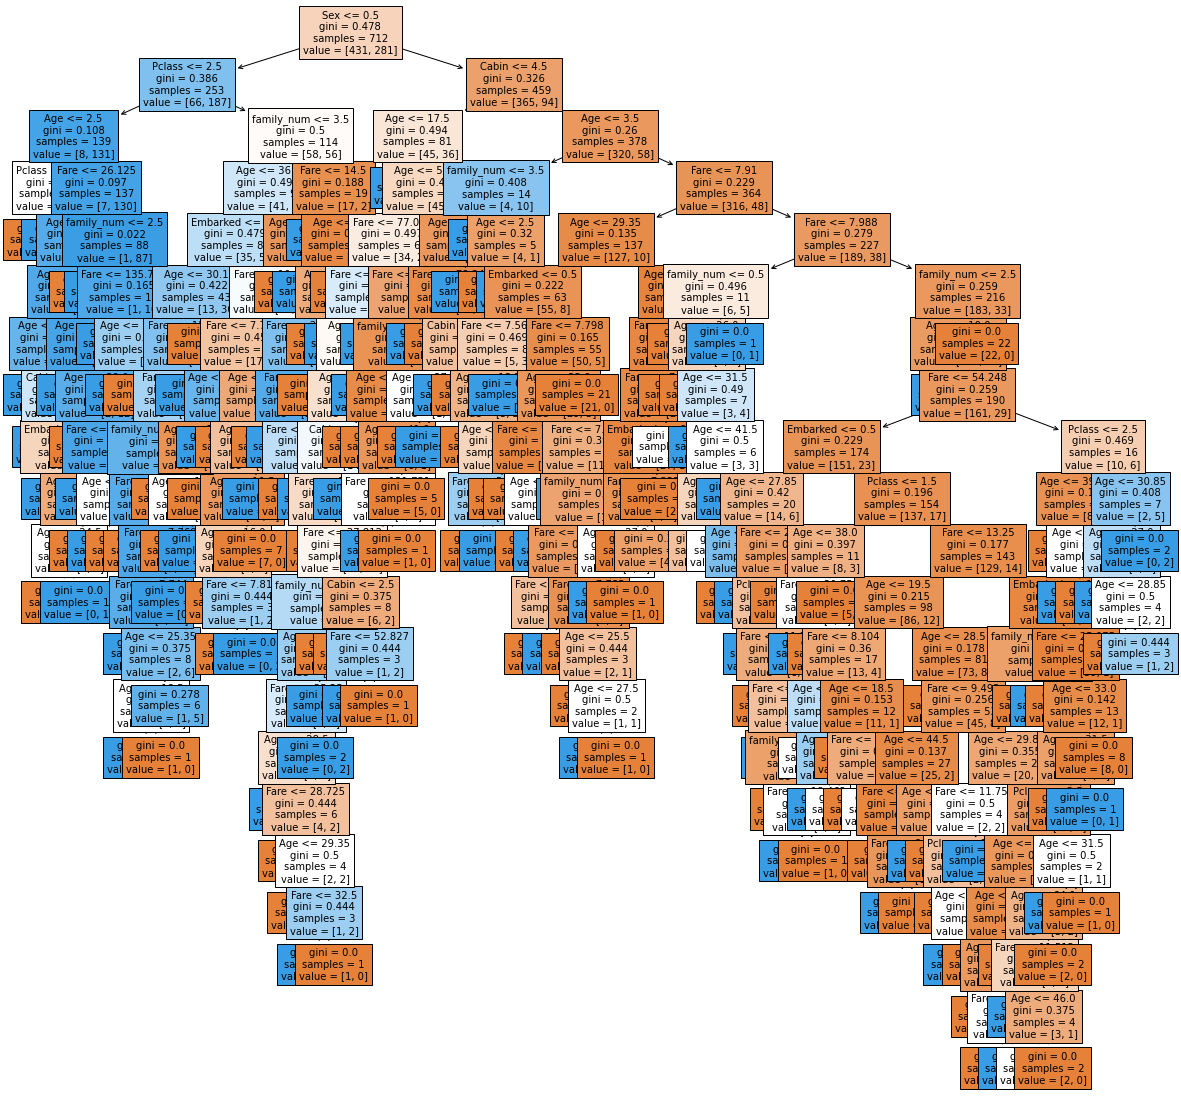

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(dt_model,filled=True,fontsize=10,feature_names=feature_names)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters={'max_depth':[2,3,5,10],'min_samples_leaf':[1,5,8],
           'min_samples_split':[2,3,5]}

In [34]:
grid_dclf = GridSearchCV(dt_model,param_grid=parameters,scoring='accuracy',cv=5)

In [35]:
grid_dclf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [36]:
print('GridSearchCV 최적하이퍼 파라미터: ',grid_dclf.best_params_)
print('GridSearchCV 최고정확도 : ',grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고정확도 :  0.7977740569289865


In [37]:
y_best = best_dclf.predict(x_test)

In [38]:
accuracy_score(y_test,y_best)

0.8715083798882681

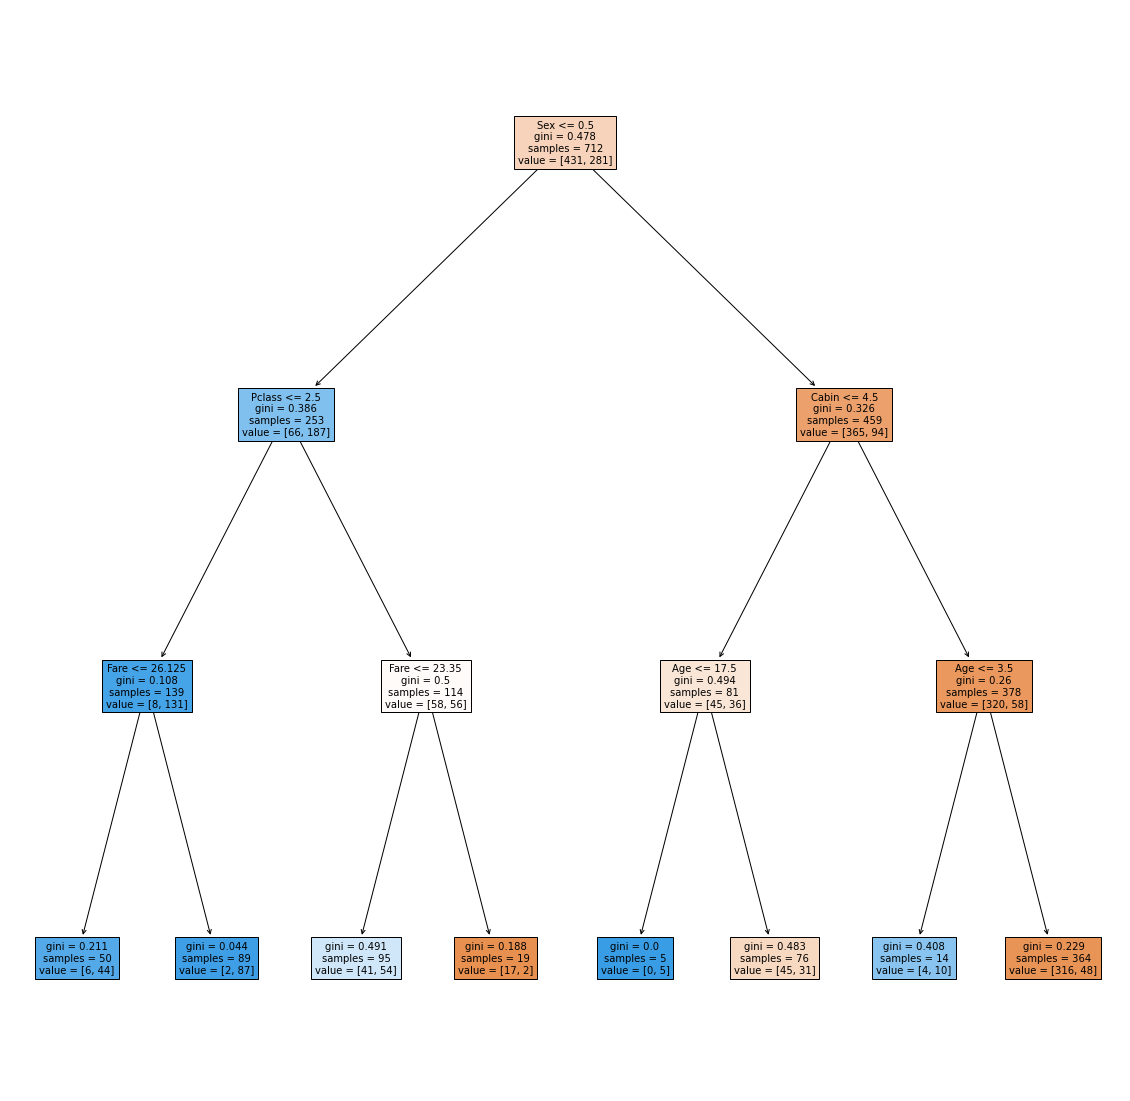

In [39]:
plt.figure(figsize=(20,20))
tree = plot_tree(best_dclf,filled=True,fontsize=10,feature_names=feature_names)

In [46]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score

In [50]:
confusion = confusion_matrix(y_test,y_best)
accuracy = accuracy_score(y_test,y_best)
precision = precision_score(y_test,y_best)
recall = recall_score(y_test,y_best)
f1 = f1_score(y_test,y_best)

In [51]:
print('오차행렬 : \n',confusion)
print('정확도 : ',accuracy)
print('정밀도 : ',precision)
print('재현율 : ',recall)
print('f1스코어 : ',f1)

오차행렬 : 
 [[109   9]
 [ 14  47]]
정확도 :  0.8715083798882681
정밀도 :  0.8392857142857143
재현율 :  0.7704918032786885
f1스코어 :  0.8034188034188035
